In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from datasets.datasets import *
from GAN.CycleGAN import *
from visualize import *
%matplotlib inline
%matplotlib notebook

In [2]:
#SETTINGS
learning_rate = 5e-7
batch_size = 4
epochs = 100
g_layers = 4
d_layers = 4
adv = 1
cyc = 10
idt = 1
setX = "landscape"
setY = "monet"

In [3]:
#DATASET
dataset = Dataset(setX, setY)
dataloader = dataset.get_loader(batch_size, shuffle=True)
print(len(dataset))

1072


In [4]:
#MODEL, DEVICE
device = torch.device("cuda")
gan = cycleGAN(device, lr=learning_rate, g_layers = g_layers, d_layers = d_layers,
               coeff_adv = adv,
               coeff_forward=cyc,
               coeff_backward=cyc,
               coeff_idt = idt)
gan.to(device);

<IPython.core.display.Javascript object>


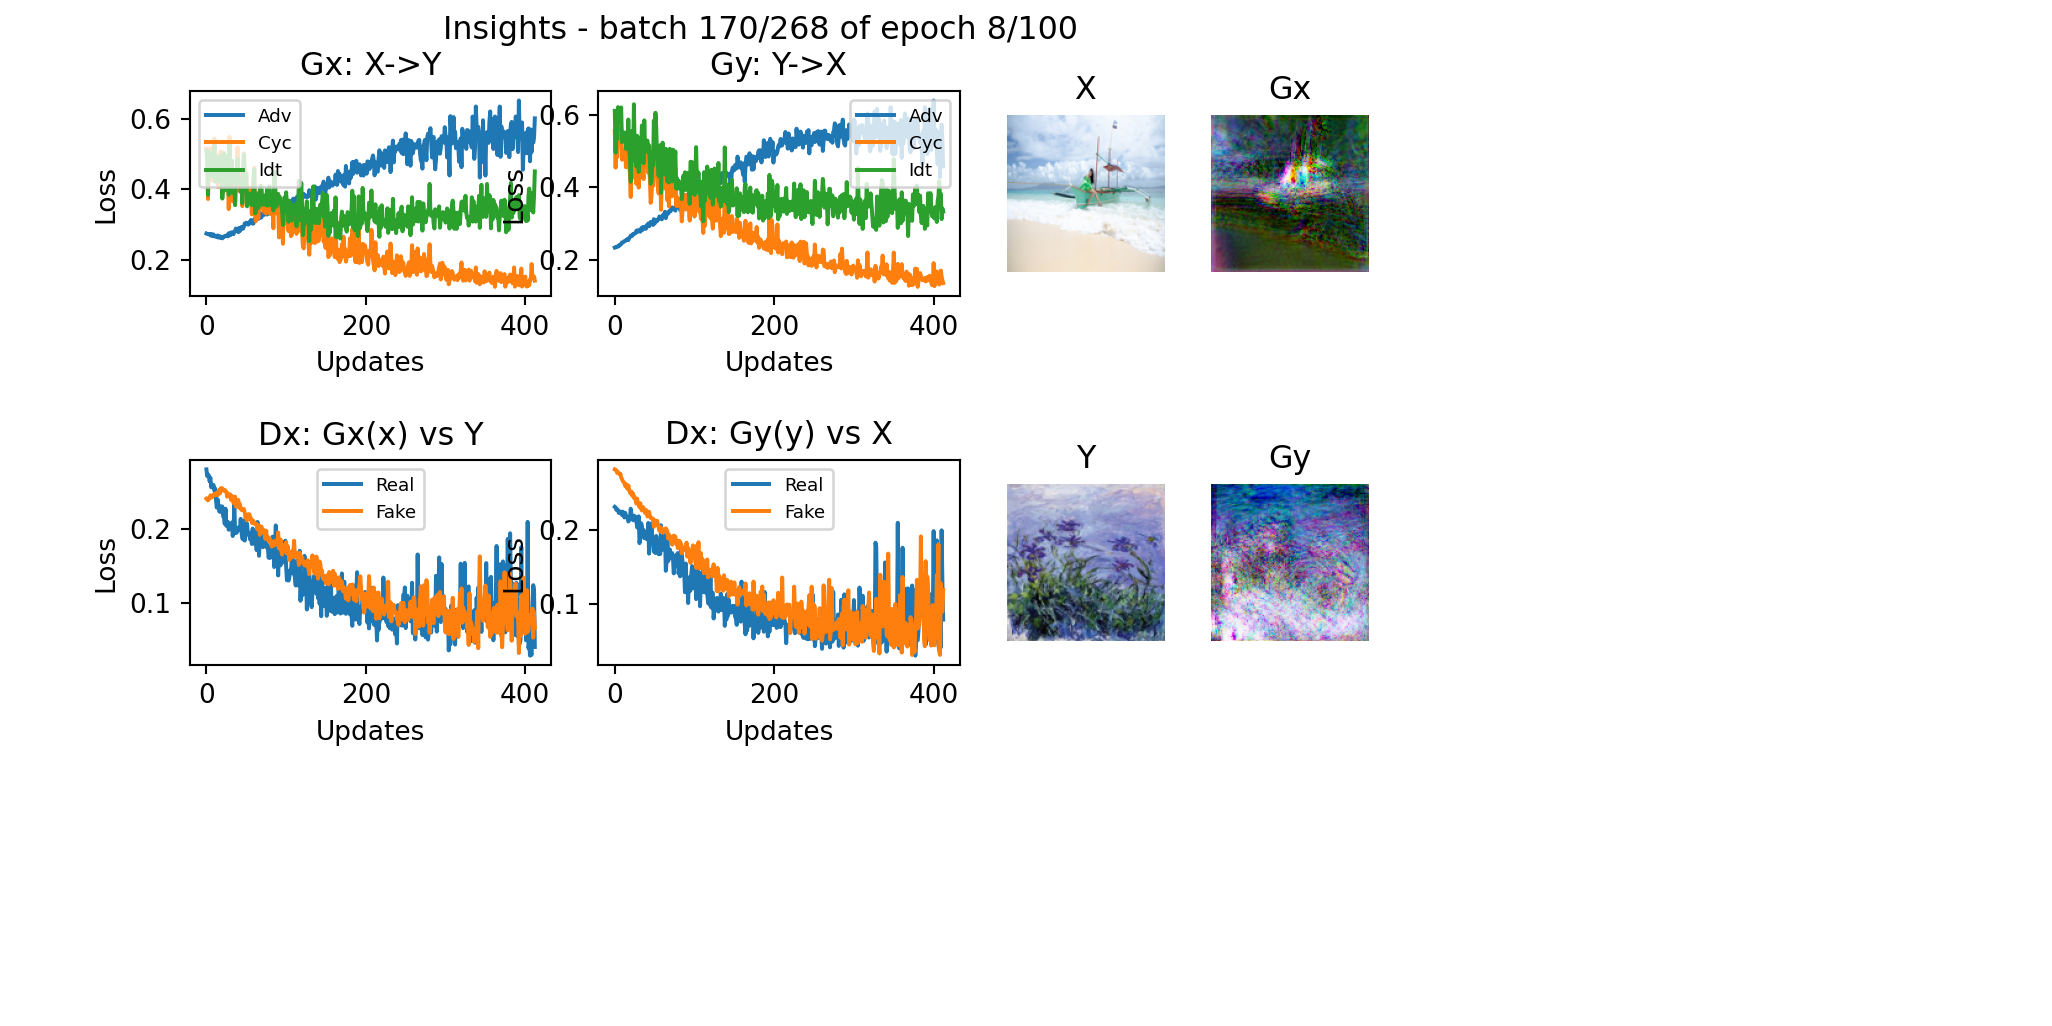

In [ ]:
torch.cuda.empty_cache() #free some memory up
insights = Insights(len(dataloader), epochs)

#TRAINING
for epoch in range(epochs):
    for i, batch in enumerate(iter(dataloader)):
        gan.forward(batch)
        gan.optimize_D()
        gan.optimize_G()
        
        torch.cuda.empty_cache() #free some memory up

        if i % 5 == 0:
            insights.update_insights(gan, i, epoch)

In [ ]:
#DATASETS
dataset = Dataset(setA, setB)
tensors = dataset.__getitem__(0)

loader = dataset.get_loader(16, True)

for batch in iter(loader):
    print(batch[1].shape)
    A1 = batch[0][0]
    A2 = batch[0][1
    B1 = batch[1][0]
    B2 = batch[1][1]
    display_sample(A1, A2, B1, B2)

In [ ]:
#MODEL AND DEVICE
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [ ]:
#DEBUG GENERATOR
generator = Generator(3, 3, 64)
generator.to(torch.device("cuda"))

print(generator)
print("RESNET IS ON: ", next(generator.model[10].blocks[0].parameters()).device)
print(list(generator.model[10].children()))
for i,m in enumerate(generator.model):
    print(i)
    try:
        print(next(m.parameters()).device)
    except StopIteration:
        continue
random_tensor = torch.randn(16, 3, 32, 32)
random_tensor = random_tensor.to(torch.device("cuda"))
    
result = generator.forward(random_tensor)